In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import copy
import scipy.stats as st
import collections
import datetime
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import copy
import scipy.stats as st
from scipy.stats import kstest
import random
import scipy.integrate as integrate
import itertools
from mpl_toolkits.mplot3d import Axes3D
import datetime
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
# import packages
import pandas as pd
import numpy as np
import jieba
import jieba.analyse as ja
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# read the keyword text file
def read_keyword(file_name):
    """
    read the keyword file, and sort all the keywords into one dictionary.
    """
    keyword_file = open(file_name, encoding='utf-8-sig')
    lines = keyword_file.read()
    keyword_dict = {}
    key_temp = ''
    for keyword in lines.split('\n'):
        if '：' in keyword:
            key_temp = keyword[0:(len(keyword)-1)]
            keyword_dict[key_temp] = []
        
        elif len(keyword) == 0:
            continue
        else:
            keyword_dict[key_temp].append(keyword)
    
    keyword_file.close()
            
    return keyword_dict


# use dictionary to categorize
def categorize_using_dict(df, column, dictionary):
    """
    using the dictionary and a given column of a given dataframe,
    and judge whether each row should be in the categories in the
    keyword dictionary. The result is appended to the dataframe
    automatically.
    """
    
    categorization_boolean = {}
    for category in dictionary:
        boolean = np.array([False] * df.shape[0])
        for keyword in dictionary[category]:
            boolean = boolean | np.array([s == s and keyword in s for s in df[column]])
        categorization_boolean[category] = boolean
    
    for category in categorization_boolean:
        df[category] = categorization_boolean[category]


        

In [3]:
Repair_dict = read_keyword('R.txt')
Maintain_dict = read_keyword('M.txt')

In [ ]:
project_df = pd.read_csv('D:\PRP Data\shanghai\health_records_shanghai0_clean.csv', encoding='utf-8', index_col=0)

In [ ]:
for i in range(5):
    try:
        df=pd.read_csv('D:\PRP Data\shanghai\health_records_shanghai'+str(i+1)+'_clean.csv', encoding='gbk', index_col=0)
    except:
         df=pd.read_csv('D:\PRP Data\shanghai\health_records_shanghai'+str(i+1)+'_clean.csv', encoding='utf-8', index_col=0)
    project_df =pd.concat([ project_df, df], axis = 0)

In [104]:
project_df

,region,rawId,company_code,vin,vpn,fault_desc,repair_mileage,repair_date,cost_list_code,settle_date,...,model,imported,price,fuel_form,transmission,displacement,engine,valid,car_id_judge,company_4s
id,,,,,,,,,,,,,,,,,,,,,
43.0,31,39.0,3.101120e+14,WBAMU3104CDX56026,苏EZ213Q,NaN,45688.0,2017-10-11,WXhbqx20171000086,20171011,...,进口宝马5系 旅行版,进口,666600.0,汽油,手自一体变速器,2996.0,3.0L,True,WBAMU3104CDX56026苏EZ213Q上海华邦龙柏汽车服务有限公司,True
47.0,31,48.0,3.101120e+14,WDCDA5GB5GA659354,沪M85525,NaN,14250.0,2017-10-09,WXhbqx20171000041,20171011,...,未定义,未定义,未定义,未定义,未定义,未定义,未定义,True,WDCDA5GB5GA659354沪M85525上海华邦龙柏汽车服务有限公司,True
48.0,31,61.0,3.101120e+14,WVWPR13C0EE112839,沪AKF932,NaN,58228.0,2017-10-10,WX000120171010012,20171012,...,未定义,未定义,未定义,未定义,未定义,未定义,未定义,True,WVWPR13C0EE112839沪AKF932上海美溢汽车销售服务有限公司,True
51.0,31,54.0,3.101120e+14,LSGUA84W7EE018456,沪ACV672,NaN,109890.0,2017-10-12,WX000120171012001,20171012,...,别克GL8,国产,309900.0,汽油,手自一体变速器,2384.0,2.4L,True,LSGUA84W7EE018456沪ACV672上海美溢汽车销售服务有限公司,True
52.0,31,5.0,3.101120e+14,WVWFD73D588002958,沪H26679,NaN,10000.0,2016-07-29,WX000120160729006,20160730,...,辉腾,进口,792250.0,汽油,手自一体变速器,3189.0,3.2L,True,WVWFD73D588002958沪H26679上海美溢汽车销售服务有限公司,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18255878.0,31,11443715.0,3.101170e+14,JNKDV61E0DM343100,沪AER695,保养,NaN,2018-11-22,M-201811220005,20181122,...,未定义,未定义,未定义,未定义,未定义,未定义,未定义,True,JNKDV61E0DM343100沪AER695上海宝治汽车服务有限公司,True
18255882.0,31,6289406.0,3.100000e+14,LE4ZG4JB5HL079261,沪L83718,保养，维修，检查，钣金，喷漆，事故,9892.0,2018-02-07,79838,20180207,...,奔驰E级,国产,497833.3333333333,汽油,手自一体变速器,1991.0,2.0T,True,LE4ZG4JB5HL079261沪L83718上海利之星汽车有限公司闵行分公司,True
18255884.0,31,8276596.0,3.100000e+14,LFPM4ACCXD1A38436,沪A97T15,NaN,299721.0,2016-02-02,ESH052SV20160202025,20160202,...,未定义,未定义,未定义,未定义,未定义,未定义,未定义,True,LFPM4ACCXD1A38436沪A97T15上海绿地杨浦汽车销售服务有限公司,True


In [106]:
categorize_using_dict(project_df, 'fault_desc', Repair_dict )

In [107]:
categorize_using_dict(project_df, 'fault_desc', Maintain_dict )

In [288]:
project_df

,region,rawId,company_code,vin,vpn,fault_desc,repair_mileage,repair_date,cost_list_code,settle_date,...,price,fuel_form,transmission,displacement,engine,valid,car_id_judge,company_4s,repair_tag,maintain_tag
id,,,,,,,,,,,,,,,,,,,,,
43.0,31,39.0,3.101120e+14,WBAMU3104CDX56026,苏EZ213Q,NaN,45688.0,2017-10-11,WXhbqx20171000086,20171011,...,666600.0,汽油,手自一体变速器,2996.0,3.0L,True,WBAMU3104CDX56026苏EZ213Q上海华邦龙柏汽车服务有限公司,True,False,False
47.0,31,48.0,3.101120e+14,WDCDA5GB5GA659354,沪M85525,NaN,14250.0,2017-10-09,WXhbqx20171000041,20171011,...,未定义,未定义,未定义,未定义,未定义,True,WDCDA5GB5GA659354沪M85525上海华邦龙柏汽车服务有限公司,True,False,False
48.0,31,61.0,3.101120e+14,WVWPR13C0EE112839,沪AKF932,NaN,58228.0,2017-10-10,WX000120171010012,20171012,...,未定义,未定义,未定义,未定义,未定义,True,WVWPR13C0EE112839沪AKF932上海美溢汽车销售服务有限公司,True,False,False
51.0,31,54.0,3.101120e+14,LSGUA84W7EE018456,沪ACV672,NaN,109890.0,2017-10-12,WX000120171012001,20171012,...,309900.0,汽油,手自一体变速器,2384.0,2.4L,True,LSGUA84W7EE018456沪ACV672上海美溢汽车销售服务有限公司,True,False,False
52.0,31,5.0,3.101120e+14,WVWFD73D588002958,沪H26679,NaN,10000.0,2016-07-29,WX000120160729006,20160730,...,792250.0,汽油,手自一体变速器,3189.0,3.2L,True,WVWFD73D588002958沪H26679上海美溢汽车销售服务有限公司,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18255878.0,31,11443715.0,3.101170e+14,JNKDV61E0DM343100,沪AER695,保养,NaN,2018-11-22,M-201811220005,20181122,...,未定义,未定义,未定义,未定义,未定义,True,JNKDV61E0DM343100沪AER695上海宝治汽车服务有限公司,True,False,True
18255882.0,31,6289406.0,3.100000e+14,LE4ZG4JB5HL079261,沪L83718,保养，维修，检查，钣金，喷漆，事故,9892.0,2018-02-07,79838,20180207,...,497833.3333333333,汽油,手自一体变速器,1991.0,2.0T,True,LE4ZG4JB5HL079261沪L83718上海利之星汽车有限公司闵行分公司,True,True,True
18255884.0,31,8276596.0,3.100000e+14,LFPM4ACCXD1A38436,沪A97T15,NaN,299721.0,2016-02-02,ESH052SV20160202025,20160202,...,未定义,未定义,未定义,未定义,未定义,True,LFPM4ACCXD1A38436沪A97T15上海绿地杨浦汽车销售服务有限公司,True,False,False


In [2]:
all_data = pd.read_csv("D:/PRP/Data/repair_record_basic_info_valid.csv",header = 0,index_col = 0)
all_data.rename(columns={"维修":"repair_tag"}, inplace = True)
all_data.rename(columns={"保养":"maintain_tag"}, inplace = True)


In [3]:

all_data_noid = all_data.loc[:,all_data.columns != 'id']
all_data_noid = all_data_noid[all_data_noid.valid == True]

In [4]:
produce_year = all_data_noid["PRODUCE_YEAR"] #null 67279
repair_date = all_data_noid["repair_date"] #no null
repair_finish_date = all_data_noid["settle_date"]
repair_mileage = all_data_noid["repair_mileage"] #no null
fail_type = all_data_noid["fault_desc"]
pick_time = all_data_noid["CKTCSJ"] #null 67279. - length: 279888
repair_tag = all_data_noid["repair_tag"]
maintain_tag = all_data_noid["maintain_tag"]
location = all_data_noid["company_division_code"] #null 49777
company = all_data_noid['company_name']
brand = all_data_noid["brand_name"] #null 83365
licence = all_data_noid["vpn_str"] #null 1779

'''combine some columns together, delete NaN and -'''
data = pd.concat([produce_year, repair_date, repair_mileage, location, company, repair_tag,\
                  maintain_tag, brand], axis = 1)
#data = pd.concat([pick_time, repair_date, repair_mileage], axis = 1)
data.dropna(inplace = True)


In [5]:
repair_year = [0 for i in range(data.shape[0])]
for i in range(data.shape[0]):
    repair_year[i] = int(data["repair_date"].iloc[i][:4])
data["repair_year"] = repair_year
data["PRODUCE_YEAR"] = pd.to_numeric(data["PRODUCE_YEAR"], downcast = "integer")
data.rename(columns={"PRODUCE_YEAR":"produce_year"}, inplace = True)

In [6]:
repair_month = [0 for i in range(data.shape[0])]
for i in range(data.shape[0]):
    repair_month[i] = int(data["repair_date"].iloc[i][5:7])
data["repair_month"] = repair_month

data["produce_month"] = [6 for i in range(data.shape[0])]

In [7]:
month_to_first_fail = (data["repair_year"] - data["produce_year"]) * 12 + \
                data["repair_month"] - data["produce_month"]
data["month_to_first_fail"] = month_to_first_fail


In [8]:
usage_rate_at_failure = data["repair_mileage"] / data["month_to_first_fail"]
data["usage_rate_at_failure"] = usage_rate_at_failure


In [9]:
data.drop(data[data["repair_mileage"]<=0].index, inplace = True)
data.drop(data[data["month_to_first_fail"]<=0].index, inplace = True) #0 use time is unreasonable. 


In [10]:
repair_judge = []
for i in range(data.shape[0]):
    if data.repair_tag.iloc[i]<1 and data.maintain_tag.iloc[i] >0:
        repair_judge.append(False)
    elif data.repair_tag.iloc[i]>=10 or data.maintain_tag.iloc[i] >=10:
        repair_judge.append(False)
    else:
        repair_judge.append(True)

data["repair_judge"] = repair_judge
data = data[data.repair_judge == True]


In [11]:
repair_year_month = [0 for i in range(data.shape[0])]
repair_yearmonth_str = [0 for i in range(data.shape[0])]
for i in range(len(repair_year_month)):
    time_str = data["repair_date"].iloc[i][:7]
    repair_yearmonth_str[i] = time_str
    repair_year_month[i] = datetime.datetime.strptime(time_str,'%Y-%m') #a.strftime("%Y-%m")
data["repair_year_month"] = repair_year_month
data["repair_yearmonth_str"] = repair_yearmonth_str



In [12]:
Origin=data

In [459]:
data=Origin

In [460]:
NHPP=1

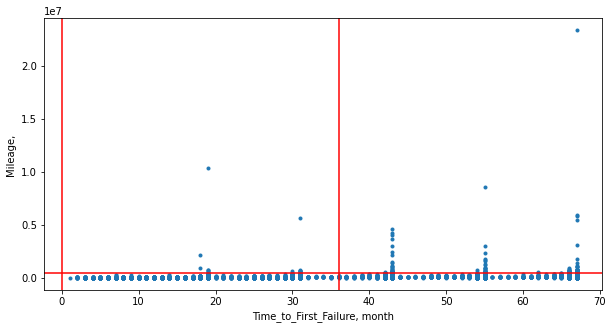

In [424]:
if NHPP == 1:
    data1 = data[data.produce_year == 2017]
    data2 = data[data.produce_year == 2016]
    data3 = data[data.produce_year == 2015]
    data4 = data[data.produce_year == 2014]
    data7 = data[data.produce_year == 2013]
    data5=pd.concat([data1, data2], axis = 0)
    data6=pd.concat([data3, data4], axis = 0)
    data8=pd.concat([data5, data6], axis = 0)
    data=pd.concat([data7, data8], axis = 0)
    data = data[data.repair_year_month >= datetime.datetime.strptime('2017-06','%Y-%m')]
    data = data[data.repair_year_month <= datetime.datetime.strptime('2018-11','%Y-%m')]


#data.to_csv( 'D:\PRP\Codes\car_Rcode\code\\data.csv', encoding='gbk', index=False)
'''mileage vs time scatter'''
plt.figure(figsize = (10,5))
#plt.scatter(data["year_to_first_fail"], data["repair_mileage"], marker = ".")
plt.scatter(data["month_to_first_fail"], data["repair_mileage"], marker = ".")
plt.axhline(y=0.045*10**7, color='r', linestyle='-')
#plt.axvline(x=3, color='r', linestyle='-')
plt.axvline(x=36, color='r', linestyle='-')
plt.axvline(x=0, color='r', linestyle='-')
#plt.xlabel("Time_to_First_Failure, year")
plt.xlabel("Time_to_First_Failure, month")
plt.ylabel("Mileage, ")
plt.show()

train = data[data.repair_year_month < datetime.datetime.strptime('2017-10', '%Y-%m')]
test = data[data.repair_year_month >= datetime.datetime.strptime('2017-10', '%Y-%m')]

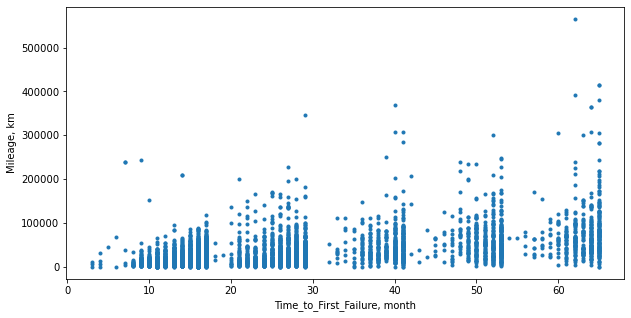

In [394]:
plt.figure(figsize=(10, 5))
# plt.scatter(data["year_to_first_fail"], data["repair_mileage"], marker = ".")
plt.scatter(data["month_to_first_fail"], data["repair_mileage"], marker=".")
# plt.xlabel("Time_to_First_Failure, year")
plt.xlabel("Time_to_First_Failure, month")
plt.ylabel("Mileage, km")
plt.show()


In [619]:
data=Origin
NHPP=1

In [ ]:
if NHPP == 1:
    data = data[data.produce_year == 2017]
    data = data[data.repair_year_month >= datetime.datetime.strptime('2018-06', '%Y-%m')]
    data = data[data.repair_year_month <= datetime.datetime.strptime('2018-11', '%Y-%m')]

# data.to_csv( 'D:\PRP\Codes\car_Rcode\code\\data.csv', encoding='gbk', index=False)
'''mileage vs time scatter'''
plt.figure(figsize=(10, 5))
# plt.scatter(data["year_to_first_fail"], data["repair_mileage"], marker = ".")
plt.scatter(data["month_to_first_fail"], data["repair_mileage"], marker=".")
plt.axhline(y=0.06 * 10 ** 7, color='r', linestyle='-')
# plt.axvline(x=3, color='r', linestyle='-')
plt.axvline(x=36, color='r', linestyle='-')
plt.axvline(x=0, color='r', linestyle='-')
# plt.xlabel("Time_to_First_Failure, year")
plt.xlabel("Time_to_Failure, month",font1)
plt.ylabel("Mileage",font1)
plt.show()

train = data[data.repair_year_month < datetime.datetime.strptime('2018-10', '%Y-%m')]
test = data[data.repair_year_month >= datetime.datetime.strptime('2018-10', '%Y-%m')]


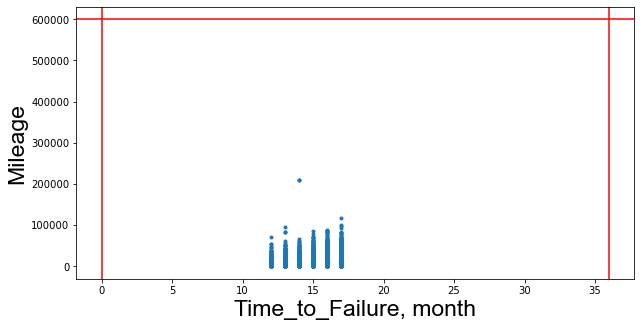

In [624]:
if NHPP == 1:
    data = data[data.produce_year == 2017]
    data = data[data.repair_year_month >= datetime.datetime.strptime('2018-06', '%Y-%m')]
    data = data[data.repair_year_month <= datetime.datetime.strptime('2018-11', '%Y-%m')]

# data.to_csv( 'D:\PRP\Codes\car_Rcode\code\\data.csv', encoding='gbk', index=False)
'''mileage vs time scatter'''
plt.figure(figsize=(10, 5))
# plt.scatter(data["year_to_first_fail"], data["repair_mileage"], marker = ".")
plt.scatter(data["month_to_first_fail"], data["repair_mileage"], marker=".")
plt.axhline(y=0.06 * 10 ** 7, color='r', linestyle='-')
# plt.axvline(x=3, color='r', linestyle='-')
plt.axvline(x=36, color='r', linestyle='-')
plt.axvline(x=0, color='r', linestyle='-')
# plt.xlabel("Time_to_First_Failure, year")
plt.xlabel("Time_to_Failure, month",font1)
plt.ylabel("Mileage",font1)
plt.show()

train = data[data.repair_year_month < datetime.datetime.strptime('2018-10', '%Y-%m')]
test = data[data.repair_year_month >= datetime.datetime.strptime('2018-10', '%Y-%m')]


In [625]:
data_usage_rate = train.usage_rate_at_failure

In [626]:
a, b, c, d = st.distributions.exponweib.fit(data_usage_rate)
x = np.arange(0, max(data_usage_rate), 1)  # max usage rate = 53656
fitted_y = st.distributions.exponweib.pdf(x, a, b, c, d)

In [627]:
print(kstest)

<function kstest at 0x00000250A94C3790>


In [647]:
data

,produce_year,repair_date,repair_mileage,company_division_code,company_name,repair_tag,maintain_tag,brand_name,repair_year,repair_month,produce_month,month_to_first_fail,usage_rate_at_failure,repair_judge,repair_year_month,repair_yearmonth_str
8957,2017,2018-09-15,23102.0,310107.0,7252,1.0,0.0,荣威,2018,9,6,15,1540.133333,True,2018-09-01,2018-09
8964,2017,2018-09-10,5604.0,310107.0,7252,3.0,1.0,名爵,2018,9,6,15,373.600000,True,2018-09-01,2018-09
8973,2017,2018-10-20,13461.0,310107.0,7252,3.0,0.0,荣威,2018,10,6,16,841.312500,True,2018-10-01,2018-10
8986,2017,2018-10-24,721.0,310107.0,7252,4.0,1.0,荣威,2018,10,6,16,45.062500,True,2018-10-01,2018-10
8987,2017,2018-09-12,24983.0,310107.0,7252,3.0,0.0,荣威,2018,9,6,15,1665.533333,True,2018-09-01,2018-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505405,2017,2018-06-23,11154.0,310117.0,11086,5.0,0.0,奔驰,2018,6,6,12,929.500000,True,2018-06-01,2018-06
505409,2017,2018-06-23,27064.0,310117.0,11086,4.0,0.0,别克,2018,6,6,12,2255.333333,True,2018-06-01,2018-06
505428,2017,2018-07-01,27565.0,310117.0,11086,1.0,0.0,奥迪,2018,7,6,13,2120.384615,True,2018-07-01,2018-07
505432,2017,2018-07-01,19799.0,310117.0,11086,3.0,0.0,别克,2018,7,6,13,1523.000000,True,2018-07-01,2018-07


In [655]:
data["usage_rate_at_failure"].describe()

count     2033.000000
mean      1180.434331
std       1180.769676
min          0.333333
25%        322.250000
50%        842.125000
75%       1561.764706
max      15000.000000
Name: usage_rate_at_failure, dtype: float64

In [629]:
fitted_y

array([3.76473343e-04, 4.26287984e-04, 4.60652854e-04, ...,
       6.00830794e-09, 6.00421468e-09, 6.00012426e-09])

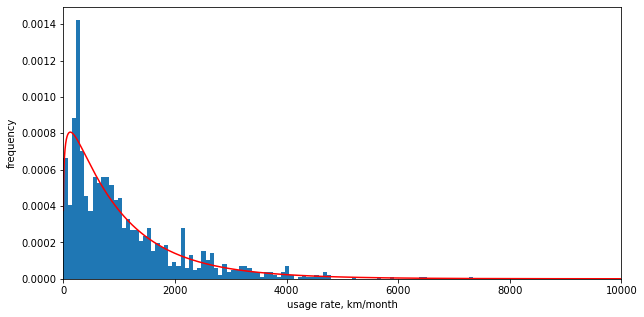

KstestResult(statistic=0.1282625397465486, pvalue=0.40167170134293195)

In [630]:
plt.figure(figsize=(10, 5))
plt.hist(data_usage_rate, bins=200, histtype="barstacked",density=True)
plt.plot(x, fitted_y, 'r-')
plt.xlim(0, 10000)
plt.xlabel("usage rate, km/month")
plt.ylabel("frequency")
plt.show()

kstest(data_usage_rate, 'exponweib', [a, b, c, d])  # len = 15504
kstest(random.sample(list(data_usage_rate), 100), 'exponweib', [a, b, c, d])
kstest(list(data_usage_rate[::25]), 'exponweib', [a, b, c, d])


In [631]:
begin_month = min(train.repair_month.unique())
end_month = max(train.repair_month.unique())
t = sorted(train.month_to_first_fail.unique())
W0 = 36
U0 = 60000
r0 = U0 / W0

dk = []
for i in range(begin_month, end_month + 1):
    dk.append(len(data[data.repair_month == i]))


In [632]:
N = 1000000
E_N = []
for i in range(len(t)):
    E_N.append(N * st.distributions.exponweib.cdf(U0 / t[i], a, b, c, d))

R_min = []
R_max = []
r_t_data = []
for per_t in t:
    data1 = data[data.month_to_first_fail == per_t]
    r_t_data.append(np.mean(data1.usage_rate_at_failure))

    #    R_min.append(min(data1.usage_rate_at_failure))
    R_min.append(0)
    R_max.append(U0 / per_t)


In [633]:
ind

2

In [636]:
likelihood = -10000000
alpha_final = -1
beta_final = -1
gamma_final = -1
for alpha0 in np.arange(0.1, 100, 1):
    if int(alpha0) % 10 == 0:
        print("current alpha: " + str(int(alpha0)) + '/' + '100')
    for beta0 in np.arange(0.1, 10, 0.1):
        for gamma in np.arange(1, 5, 0.1):
            prob = 0
            for k in t:
                ind = k - t[0]
                prob += dk[ind] * math.log(E_N[ind] / alpha0 ** beta0 * \
                                           (r_t_data[ind] / r0) ** (gamma * beta0) * (
                                                       (k + 1) ** beta0 - (k) ** beta0)) - \
                        E_N[ind] / alpha0 ** beta0 * (r_t_data[ind] / r0) ** (gamma * beta0) * \
                        ((k + 1) ** beta0 - (k) ** beta0) \
                        - math.log(math.factorial(dk[ind]))

            if prob > likelihood:
                likelihood = prob
                alpha_final = alpha0
                beta_final = beta0
                gamma_final = gamma


current alpha: 0/100
current alpha: 10/100
current alpha: 20/100
current alpha: 30/100
current alpha: 40/100
current alpha: 50/100
current alpha: 60/100
current alpha: 70/100
current alpha: 80/100
current alpha: 90/100


In [637]:
t_val = sorted(test.month_to_first_fail.unique())
# first_month = test[test.month_to_first_fail == \
#                   t_pred[i]].repair_yearmonth_str.unique()[0]


t_pred = np.arange(1, 50)

'''true value of number of claims'''
begin_month_pred = min(test.repair_month.unique())
end_month_pred = max(test.repair_month.unique())
dk_pred = []
for i in range(begin_month_pred, end_month_pred + 1):
    dk_pred.append(len(data[data.repair_month == i]))

'''predicted true usage rate'''
r_t_data_pred = []
for per_t in t_val:
    data1 = data[data.month_to_first_fail == per_t]
    r_t_data_pred.append(np.mean(data1.usage_rate_at_failure))



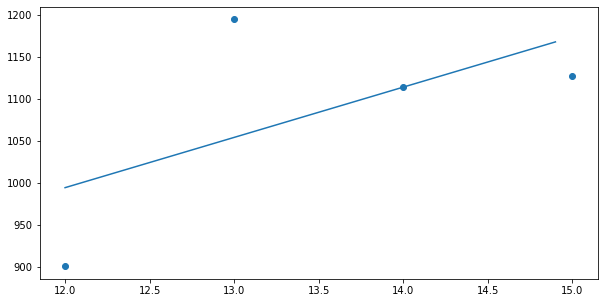

In [638]:
'''how to deal with usage rate prediction?'''
usage_rate = r_t_data
usage_rate_time = t

X = np.column_stack([usage_rate_time])
Y = usage_rate

regr = linear_model.LinearRegression()
regr.fit(X, Y)

X_test = np.arange(12, 15, 0.1)
X_test = np.column_stack([X_test])
y_pred = regr.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(np.arange(12, 15, 0.1), y_pred)
plt.scatter(usage_rate_time, usage_rate)
plt.show()

R2 = r2_score(usage_rate, regr.predict(X))

''''''
E_N_pred = []
for per_t in t_pred:
    E_N_pred.append(N * st.distributions.exponweib.cdf(U0 / (per_t), a, b, c, d))

R_min = []
R_max = []
for per_t in t_pred:
    R_min.append(0)
    R_max.append(U0 / per_t)


In [639]:
m = np.column_stack([t_pred])
r = regr.predict(m)

alpha0 = alpha_final
beta0 = beta_final
gamma = gamma_final

inte_lambda = []
for i in range(len(t_pred)):
    inte_lambda.append(1 / alpha0 / (r0 / r[i]) ** gamma / (alpha0 * (r0 / r[i]) ** gamma) ** (beta0 - 1) \
                       * (t_pred[i] ** beta0 - (t_pred[i] - 1) ** beta0))


In [642]:
pred_val

[0.03271178959687329,
 0.3085422666561893,
 1.1281023696306436,
 2.9056120511488857,
 6.1981233936138445,
 11.717522853212895,
 20.34031738890134,
 33.11407774248551,
 51.26071510186407,
 76.17717404748838,
 109.43418871618356,
 152.77366956017104,
 208.1051707936137,
 277.5017774357413,
 363.1956592449434,
 467.5734679804708,
 593.1717014198155,
 742.6721186694515,
 918.8972631349925,
 1124.80612930363,
 1363.4899951120092,
 1638.1684315346502,
 1952.1854939586692,
 2309.00609505205,
 2712.2125555619327,
 3165.501327344248,
 3672.679881599467,
 4237.663754534761,
 4864.4737423198685,
 5557.233237128655,
 6320.165696172833,
 7157.5922358734915,
 8073.929343635748,
 9073.686700058175,
 10161.465104799257,
 11341.954499722604,
 12619.932083337211,
 14000.260510936872,
 15487.886175210988,
 17087.83756245343,
 18805.223679827417,
 20645.23254945853,
 22613.12976541871,
 24714.25710993741,
 26954.031225429204,
 29337.94233916225,
 31871.553037609567,
 34560.49708772832,
 37410.47830259655]

In [643]:
dk_pred

[449, 441]

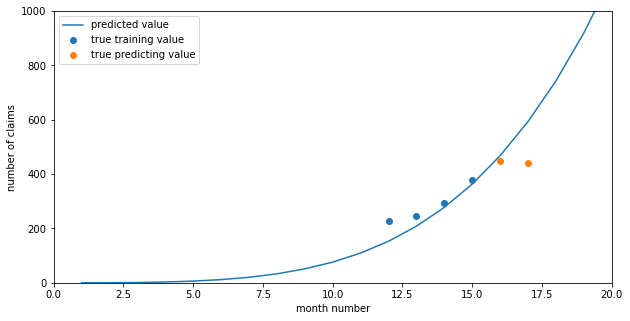

In [640]:
pred_val = []
for i in range(len(t_pred)):
    pred_val.append(E_N_pred[i] * inte_lambda[i])

plt.figure(figsize=(10, 5))
plt.plot(t_pred, pred_val, label='predicted value')
plt.scatter(t, dk, label='true training value')
plt.scatter(sorted(test.month_to_first_fail.unique()), dk_pred, label='true predicting value')
plt.legend()
plt.xlim(0,20)
plt.ylim(0,1000)
plt.axhline(y=10000, color='r', linestyle='-')
#plt.axvline(x=3, color='r', linestyle='-')
plt.axvline(x=30, color='r', linestyle='-')
plt.xlabel("month number")
plt.ylabel("number of claims")
plt.show()



In [440]:
%matplotlib inline

import glob
from platform import python_version

import matplotlib
import numpy as np
import pandas as pd
import sklearn
import torch

In [382]:
train_x 

array([ 0.        ,  0.18831167,  0.3698853 ,  0.5382239 ,  0.68730414,
        0.8117917 ,  0.9072322 ,  0.9702108 ,  0.9984739 ,  0.9910102 ,
        0.94808686,  0.87123966,  0.7632183 ,  0.62788796,  0.47009096,
        0.29547346,  0.1102835 , -0.07885254, -0.26516715, -0.44199368,
       -0.6030051 , -0.74244016, -0.8553097 , -0.93757516, -0.98629284,
       -0.9997196 , -0.9773751 , -0.9200588 , -0.82982147, -0.70989203,
       -0.56456167, -0.39903057, -0.21922158, -0.03156855,  0.15721405,
        0.3403713 ,  0.5113496 ,  0.66403115,  0.7929527 ,  0.8935014 ,
        0.96207935,  0.9962328 ,  0.9947397 ,  0.95765346,  0.8863011 ,
        0.7832356 ,  0.65214497,  0.49771962,  0.32548523,  0.14160451,
       -0.04734299, -0.2345965 , -0.41345584, -0.57752115, -0.720922  ,
       -0.83852726, -0.92612886, -0.9805923 , -0.9999688 , -0.98356515,
       -0.93196815, -0.847024  , -0.73177224, -0.5903367 , -0.42777807,
       -0.24991296, -0.06310563,  0.12595971,  0.31051803,  0.48

In [659]:
data.to_csv('model_nums.csv', encoding='UTF-8', index=False)

In [3]:
sin_t=[
    
   1.540133333,
0.3736,
0.8413125,
0.0450625,
1.665533333,
0.6104375,
0.557764706,
0.662235294,
0.813176471,
0.783705882,
1.745705882,
0.550352941,
0.0005,
0.0005,
0.0005,
0.2726875,
0.0005,
0.0005,
0.673625,
0.0005,
1.48625,
1.269588235,
0.586823529,
1.907764706,
1.018428571,
0.517785714,
1.1381875,
0.010583333,
0.000666667,
1.472875,
0.620066667,
0.3988125,
0.000333333,
0.516733333,
0.814266667,
1.0162,
1.237941176,
0.7443125,
1.020235294,
0.015882353,
3.478294118,
1.027,
3.4066875,
0.1068125,
1.151705882,
3.921705882,
1.604823529,
0.101,
0.8594375,
3.10425,
1.0920625,
4.731941176,
3.572214286,
0.696428571,
0.929533333,
0.234125,
0.253,
0.837,
0.592705882,
0.589588235
]

In [4]:
cos_t =[
1,
3,
3,
4,
3,
3,
2,
1,
9,
2,
3,
1,
1,
1,
1,
2,
1,
1,
1,
1,
3,
2,
2,
9,
9,
8,
8,
1,
1,
1,
1,
0,
1,
3,
0,
0,
7,
9,
1,
2,
1,
1,
1,
3,
3,
4,
6,
3,
3,
0,
2,
3,
4,
4,
7,
1,
4,
1,
0,
0
]

LSTM model: LstmRNN(
  (lstm): LSTM(1, 16)
  (forwardCalculation): Linear(in_features=16, out_features=1, bias=True)
)
model.parameters: <bound method Module.parameters of LstmRNN(
  (lstm): LSTM(1, 16)
  (forwardCalculation): Linear(in_features=16, out_features=1, bias=True)
)>
Epoch: [100/10000], Loss:5.28905
Epoch: [200/10000], Loss:0.63907
Epoch: [300/10000], Loss:0.18590
Epoch: [400/10000], Loss:0.11634
Epoch: [500/10000], Loss:0.09828
Epoch: [600/10000], Loss:0.08929
Epoch: [700/10000], Loss:0.08422
Epoch: [800/10000], Loss:0.08160
Epoch: [900/10000], Loss:0.07833
Epoch: [1000/10000], Loss:0.07656
Epoch: [1100/10000], Loss:0.07479
Epoch: [1200/10000], Loss:0.07683
Epoch: [1300/10000], Loss:0.07252
Epoch: [1400/10000], Loss:0.07153
Epoch: [1500/10000], Loss:0.07058
Epoch: [1600/10000], Loss:0.06960
Epoch: [1700/10000], Loss:0.06857
Epoch: [1800/10000], Loss:0.06747
Epoch: [1900/10000], Loss:0.06701
Epoch: [2000/10000], Loss:0.06506
Epoch: [2100/10000], Loss:0.06374
Epoch: [2200/10

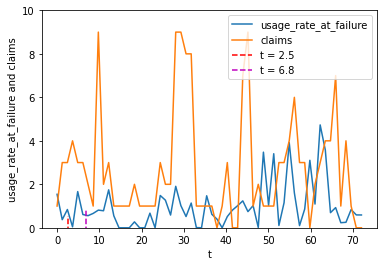

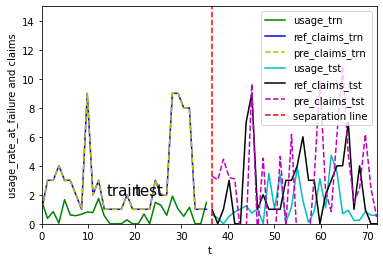

In [5]:
# -*- coding:UTF-8 -*-
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

# Define LSTM Neural Networks
class LstmRNN(nn.Module):
    """
        Parameters：
        - input_size: feature size
        - hidden_size: number of hidden units
        - output_size: number of output
        - num_layers: layers of LSTM to stack
    """
    def __init__(self, input_size, hidden_size=1, output_size=1, num_layers=1):
        super().__init__()
 
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers) # utilize the LSTM model in torch.nn 
        self.forwardCalculation = nn.Linear(hidden_size, output_size)
 
    def forward(self, _x):
        x, _ = self.lstm(_x)  # _x is input, size (seq_len, batch, input_size)
        s, b, h = x.shape  # x is output, size (seq_len, batch, hidden_size)
        x = x.view(s*b, h)
        x = self.forwardCalculation(x)
        x = x.view(s, b, -1)
        return x

if __name__ == '__main__':
    # create database
    data_len = 60
    t = np.linspace(0, 72, data_len)
    #sin_t = np.sin(t)
    #cos_t = np.cos(t)

    dataset = np.zeros((data_len, 2))
    dataset[:,0] = sin_t
    dataset[:,1] = cos_t
    dataset = dataset.astype('float32')

    # plot part of the original dataset
    plt.figure()
    plt.plot(t[0:60], dataset[0:60,0], label='usage_rate_at_failure')
    plt.plot(t[0:60], dataset[0:60,1], label = 'claims')
    plt.plot([2.5, 2.5], [-1.3, 0.55], 'r--', label='t = 2.5') # t = 2.5
    plt.plot([6.8, 6.8], [-1.3, 0.85], 'm--', label='t = 6.8') # t = 6.8
    plt.xlabel('t')
    plt.ylim(0, 10)
    plt.ylabel('usage_rate_at_failure and claims')
    plt.legend(loc='upper right')

    # choose dataset for training and testing
    train_data_ratio = 0.5 # Choose 80% of the data for testing
    train_data_len = int(data_len*train_data_ratio)
    train_x = dataset[:train_data_len, 0]
    train_y = dataset[:train_data_len, 1]
    INPUT_FEATURES_NUM = 1
    OUTPUT_FEATURES_NUM = 1
    t_for_training = t[:train_data_len]

    # test_x = train_x
    # test_y = train_y
    test_x = dataset[train_data_len:, 0]
    test_y = dataset[train_data_len:, 1]
    t_for_testing = t[train_data_len:]

    # ----------------- train -------------------
    train_x_tensor = train_x.reshape(-1, 5, INPUT_FEATURES_NUM) # set batch size to 5
    train_y_tensor = train_y.reshape(-1, 5, OUTPUT_FEATURES_NUM) # set batch size to 5
 
    # transfer data to pytorch tensor
    train_x_tensor = torch.from_numpy(train_x_tensor)
    train_y_tensor = torch.from_numpy(train_y_tensor)
    # test_x_tensor = torch.from_numpy(test_x)
 
    lstm_model = LstmRNN(INPUT_FEATURES_NUM, 16, output_size=OUTPUT_FEATURES_NUM, num_layers=1) # 16 hidden units
    print('LSTM model:', lstm_model)
    print('model.parameters:', lstm_model.parameters)
 
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(lstm_model.parameters(), lr=1e-2)
 
    max_epochs = 10000
    for epoch in range(max_epochs):
        output = lstm_model(train_x_tensor)
        loss = loss_function(output, train_y_tensor)
 
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
 
        if loss.item() < 1e-4:
            print('Epoch [{}/{}], Loss: {:.5f}'.format(epoch+1, max_epochs, loss.item()))
            print("The loss value is reached")
            break
        elif (epoch+1) % 100 == 0:
            print('Epoch: [{}/{}], Loss:{:.5f}'.format(epoch+1, max_epochs, loss.item()))
 
    # prediction on training dataset
    predictive_y_for_training = lstm_model(train_x_tensor)
    predictive_y_for_training = predictive_y_for_training.view(-1, OUTPUT_FEATURES_NUM).data.numpy()

    # torch.save(lstm_model.state_dict(), 'model_params.pkl') # save model parameters to files
 
    # ----------------- test -------------------
    # lstm_model.load_state_dict(torch.load('model_params.pkl'))  # load model parameters from files
    lstm_model = lstm_model.eval() # switch to testing model

    # prediction on test dataset
    test_x_tensor = test_x.reshape(-1, 5, INPUT_FEATURES_NUM) # set batch size to 5, the same value with the training set
    test_x_tensor = torch.from_numpy(test_x_tensor)
 
    predictive_y_for_testing = lstm_model(test_x_tensor)
    predictive_y_for_testing = predictive_y_for_testing.view(-1, OUTPUT_FEATURES_NUM).data.numpy()
 
    # ----------------- plot -------------------
    plt.figure()
    plt.plot(t_for_training, train_x, 'g', label='usage_trn')
    plt.plot(t_for_training, train_y, 'b', label='ref_claims_trn')
    plt.plot(t_for_training, predictive_y_for_training, 'y--', label='pre_claims_trn')

    plt.plot(t_for_testing, test_x, 'c', label='usage_tst')
    plt.plot(t_for_testing, test_y, 'k', label='ref_claims_tst')
    plt.plot(t_for_testing, predictive_y_for_testing, 'm--', label='pre_claims_tst')

    plt.plot([t[train_data_len], t[train_data_len]], [0, 15.0], 'r--', label='separation line') # separation line

    plt.xlabel('t')
    plt.ylabel('usage_rate_at_failure and claims')
    plt.xlim(t[0], t[-1])
    plt.ylim(0, 15)
    plt.legend(loc='upper right')
    plt.text(14, 2, "train", size = 15, alpha = 1.0)
    plt.text(20, 2, "test", size = 15, alpha = 1.0)

    plt.show()